In [5]:
# Open and not sponsored bugs until May 29th, 2019
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&type=defect&sponsor=&col=id&col=summary&col=status&col=type&col=owner&col=priority&col=milestone&col=component&col=version&col=severity&col=time&col=changetime&col=parent&col=points&col=reviewer&col=reporter&col=keywords&order=priority

csv_path='/Users/gaba/Code/torproject/trac/datasets/open_bugs_no_sponsor_until_may_29_2019.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

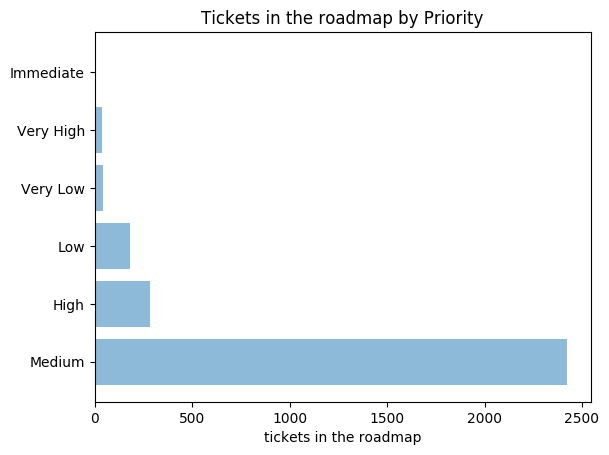

In [7]:
# which sponsors we are going to work on
sponsors_by_tickets_closed = csv_file['Priority'].value_counts()

objects = tuple(sponsors_by_tickets_closed.keys())
y_pos = np.arange(len(objects))
performance = list(sponsors_by_tickets_closed)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets in the roadmap')
plt.title('Tickets in the roadmap by Priority')

plt.show()

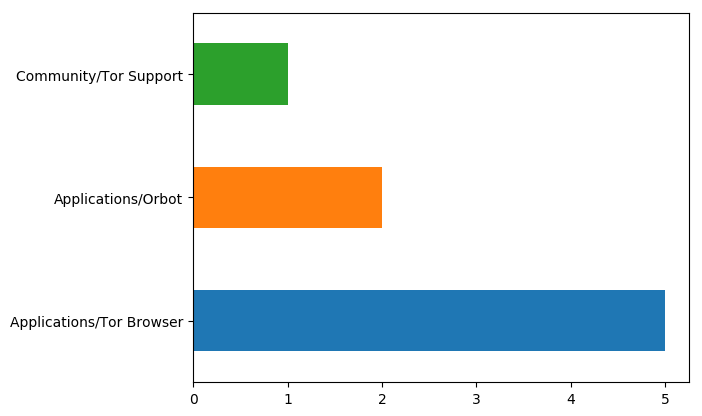

In [15]:
# what are the immediate tickets?

# which component they belong to?
csv_file.query('Priority=="Immediate"')['Component'].value_counts().plot.barh()

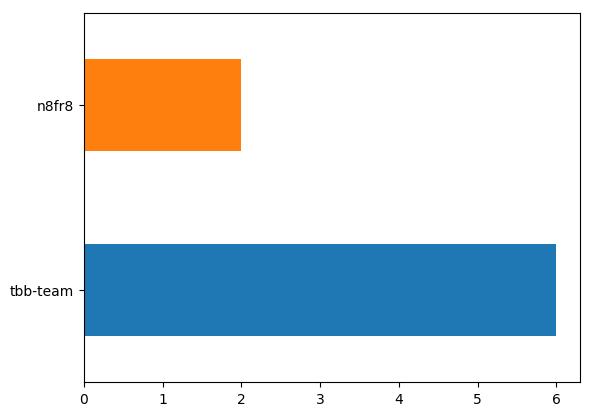

In [16]:
# who owns them?
csv_file.query('Priority=="Immediate"')['Owner'].value_counts().plot.barh()

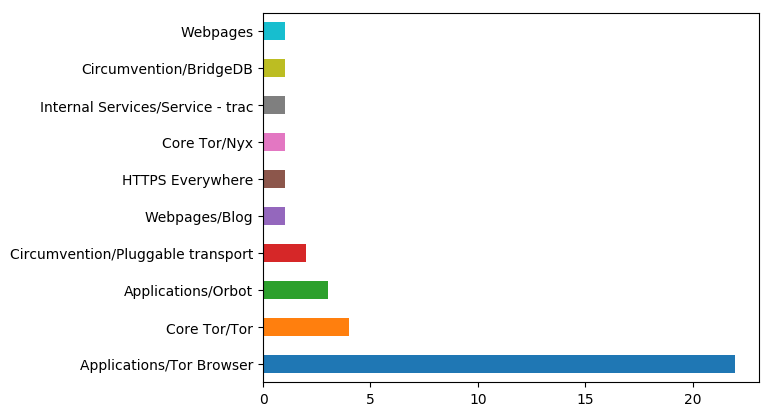

In [17]:
# what are those very high tickets?


csv_file.query('Priority=="Very High"')['Component'].value_counts().plot.barh()

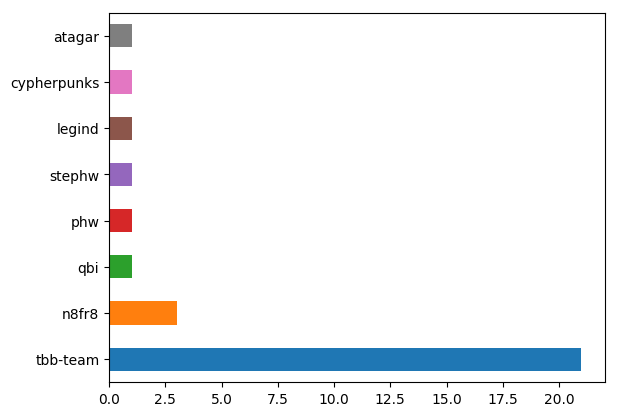

In [18]:
# who owns them?
csv_file.query('Priority=="Very High"')['Owner'].value_counts().plot.barh()

In [13]:
# Do we have any easy ticket that are immediate and very high priority?

csv_file.query('Priority=="Immediate"')['Points'].value_counts()

Series([], Name: Points, dtype: int64)

In [ ]:
# by status

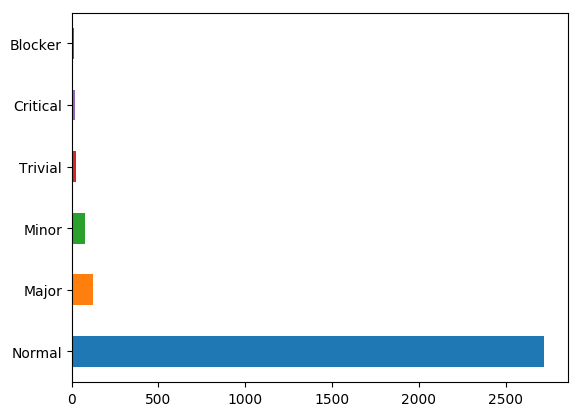

In [22]:
# What is the severity of the bugs not sponsored?

csv_file['Severity'].value_counts().plot.barh()


In [23]:
#There are a few tickets that are a blocker

csv_file.query('Severity=="Blocker"')

,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords
0,12412,Orbot broke using TransPort,new,defect,n8fr8,Immediate,NaN,Applications/Orbot,NaN,Blocker,17 jun. 2014 12:15:56,24 ene. 2019 19:48:56,NaN,NaN,NaN,isis,"orbot-14.0.3.1, orbot-14.0.4, software-enginee..."
5,28414,Tor doesn't load,needs_information,defect,tbb-team,Immediate,NaN,Community/Tor Support,NaN,Blocker,12 nov. 2018 21:38:22,30 nov. 2018 09:31:11,NaN,NaN,NaN,Waaaanm987,NaN
31,28825,update to 8.04 causes immediate crash on MacOS...,new,defect,NaN,Very High,Tor: unspecified,Core Tor/Tor,NaN,Blocker,11 dic. 2018 23:24:50,15 dic. 2018 09:03:13,NaN,NaN,NaN,gander2001,tbb-crash
44,30685,Unable to use any saved passwords (TorBrowser ...,new,defect,tbb-team,Very High,NaN,Applications/Tor Browser,NaN,Blocker,29 may. 2019 12:43:09,29 may. 2019 12:43:09,NaN,NaN,NaN,tw64_pass,TorBrowserTeam201905R
146,17345,"Cant untick ""MmsService"" in applications List",new,defect,n8fr8,High,NaN,Applications/Orbot,NaN,Blocker,13 oct. 2015 21:10:19,27 mar. 2016 12:04:42,NaN,NaN,NaN,amilopowers,"orbot, mmsservice"
276,28387,i cant open tor,needs_information,defect,tbb-team,High,NaN,Applications/Tor Browser,NaN,Blocker,9 nov. 2018 01:06:19,9 nov. 2018 09:18:07,NaN,NaN,NaN,drowdrow,NaN
452,8120,Local rulesets might be broken?,new,defect,pde,Medium,NaN,HTTPS Everywhere/EFF-HTTPS Everywhere,NaN,Blocker,31 ene. 2013 18:07:20,22 feb. 2016 11:59:19,NaN,NaN,NaN,pde,NaN
689,12411,Orbot broke using DNSPort,reopened,defect,n8fr8,Medium,NaN,Applications/Orbot,NaN,Blocker,17 jun. 2014 12:15:04,24 ene. 2019 19:49:43,NaN,NaN,NaN,isis,"orbot-14.0.3.1, orbot-14.0.4, software-enginee..."
862,14633,"Default NoScript settings says ""Allow Scripts ...",new,defect,tbb-team,Medium,NaN,Applications/Tor Browser,NaN,Blocker,1 feb. 2015 22:27:58,25 sep. 2017 21:29:56,NaN,NaN,NaN,arthuredelstein,tbb-usability uxsprint2015
1874,25299,recent update to 7.5 on portable version break...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,Tor: unspecified,Blocker,19 feb. 2018 15:08:14,19 feb. 2018 15:08:14,NaN,NaN,NaN,yldouright,control port failure


In [40]:
# Which ones are small tickets?

csv_file.query('Severity=="Blocker"').query('Points<"1"')

,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords


In [24]:
#There are a few tickets that are critical

csv_file.query('Severity=="Critical"')

,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords
1,21444,Webcam light flashes when I open NoScript menu,needs_information,defect,tbb-team,Immediate,NaN,Applications/Tor Browser,NaN,Critical,12 feb. 2017 19:00:06,8 sep. 2018 23:23:05,NaN,NaN,NaN,ChatTor,NaN
2,24698,"Torbrowser keeps hanging and freezing, plus it...",needs_information,defect,tbb-team,Immediate,NaN,Applications/Tor Browser,NaN,Critical,21 dic. 2017 21:10:24,16 jul. 2018 22:30:10,NaN,NaN,NaN,justmeee,tbb-performance
3,27955,wont let me load up tor at all,new,defect,tbb-team,Immediate,NaN,Applications/Tor Browser,Tor: unspecified,Critical,4 oct. 2018 20:18:31,25 feb. 2019 12:47:12,NaN,NaN,NaN,Stealth266,NaN
6,28690,"Problems running, installing and updating Torb...",needs_information,defect,tbb-team,Immediate,NaN,Applications/Tor Browser,NaN,Critical,3 dic. 2018 01:53:00,11 dic. 2018 08:30:54,NaN,NaN,NaN,justmeee,NaN
16,18361,Issues with corporate censorship and mass surv...,assigned,defect,cypherpunks,Very High,NaN,Applications/Tor Browser,NaN,Critical,22 feb. 2016 06:02:28,10 abr. 2019 23:11:52,NaN,1000 light years,NaN,ioerror,NaN
18,19258,Tor - closing unexpectedly,needs_information,defect,tbb-team,Very High,NaN,Applications/Tor Browser,NaN,Critical,4 jun. 2016 03:02:06,6 jun. 2016 05:40:48,NaN,NaN,NaN,illuminarch,NaN
21,23771,Certain Trac accounts are vulnerable to social...,new,defect,qbi,Very High,NaN,Internal Services/Service - trac,NaN,Critical,5 oct. 2017 11:35:11,13 oct. 2017 17:14:03,NaN,NaN,NaN,arthuredeIstein,NaN
22,24214,"""Orbot Apps VPN Mode"" window repeat itself",new,defect,n8fr8,Very High,NaN,Applications/Orbot,NaN,Critical,10 nov. 2017 08:39:47,10 nov. 2017 08:40:19,NaN,NaN,NaN,cypherpunks,NaN
23,24302,Latest orbot v15.4.1-rc1-multi Android Will no...,new,defect,n8fr8,Very High,NaN,Applications/Orbot,Tor: 0.3.0.7,Critical,15 nov. 2017 20:24:21,24 mar. 2019 05:09:49,NaN,NaN,NaN,zxzx,NaN
30,28383,HTTPS Everywhere's exceptions persist,new,defect,legind,Very High,NaN,HTTPS Everywhere,NaN,Critical,8 nov. 2018 12:05:02,8 nov. 2018 12:05:02,NaN,NaN,NaN,janbhez,NaN


In [39]:
# Which ones are small tickets?

csv_file.query('Severity=="Critical"').query('Points<"1"')

,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords


In [20]:
# Are this tickets even estimated?

# How 'big' are the tickets we have
csv_file['Points'].value_counts()


1                             101
0.5                            42
2                              37
3                              19
0.1                            19
small                          18
medium                         17
0.2                            12
5                              10
.1                              8
small/medium                    7
.2                              7
medium/large                    5
large                           5
4                               4
.5                              4
parent                          4
0                               3
10                              2
0.05                            2
1.5                             2
0.3                             2
low                             1
45                              1
15                              1
2-10                            1
6                               1
(parent)                        1
Image not saving on device      1
medium??      

In [36]:
# Let's focus on the small tickets

csv_file.query('Points<"1"')

,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords
270,28183,tor-0.3.5.3_alpha unexpected stop bug: (Sandbo...,needs_information,defect,nickm,High,Tor: 0.3.4.x-final,Core Tor/Tor,Tor: 0.3.5.3-alpha,Normal,24 oct. 2018 16:20:48,1 mar. 2019 05:02:40,NaN,0,dgoulet,n05,"sandbox, regression, 035-must, 034-backport?, ..."
688,12399,"""Hash of session info was not as expected"" sho...",new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,14 jun. 2014 16:53:07,7 jun. 2017 16:56:52,NaN,.1,NaN,ln5,tor-hs easy logging
847,14223,END_STREAM_REASON_TIMEOUT blurs together two v...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.2.7,Normal,15 ene. 2015 21:56:06,11 jun. 2017 16:23:06,NaN,0.1,NaN,arma,tor-client error-case needs-spec
865,14715,Change the default for automaphostsonresolve t...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,4 feb. 2015 15:03:08,11 jun. 2017 16:48:01,NaN,.1,NaN,Sebastian,tor-client needs-decision
870,14854,Document the hardlimit of HiddenServiceAuthori...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,11 feb. 2015 04:28:51,22 dic. 2018 15:11:08,NaN,.1,NaN,cypherpunks,"tor-hs, tor-doc, hs-auth"
879,14957,Clients wait for an extra consensus before lea...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.2.7,Normal,19 feb. 2015 22:05:28,18 sep. 2017 18:07:05,NaN,.2,NaN,asn,"tor-client, tor-guard, SponsorU-deferred, 032-..."
1179,18888,we should log an unmistakeable warning when --...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,25 abr. 2016 19:23:26,28 jun. 2017 19:49:48,NaN,.1,NaN,nickm,tor-unit-tests testing disaster-waiting-to-happen
1197,19011,Use of maxunmeasuredbw and bwweightscale is br...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,10 may. 2016 00:15:24,11 dic. 2018 02:48:35,#28807,0.5,NaN,nickm,tor-dirauth yes-its-a-bug needs-spec
1204,19074,Mark fallback directories down when their key ...,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.2.8.1-alpha,Normal,18 may. 2016 00:01:13,16 oct. 2018 00:52:29,NaN,0.5,NaN,teor,tor-client bad-retry annoying infinite-loop bo...
1211,19220,Do not override Makefile user variables,new,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,2 jun. 2016 10:42:53,2 may. 2018 17:50:56,NaN,.5,NaN,cypherpunks,"gcc-warnings, lorax, 031-deferred-20170425, 03..."


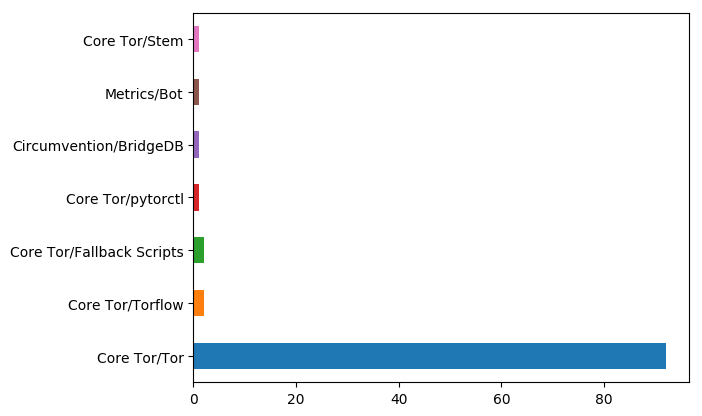

In [42]:
# Small tickets by component
csv_file.query('Points<"1"')['Component'].value_counts().plot.barh()

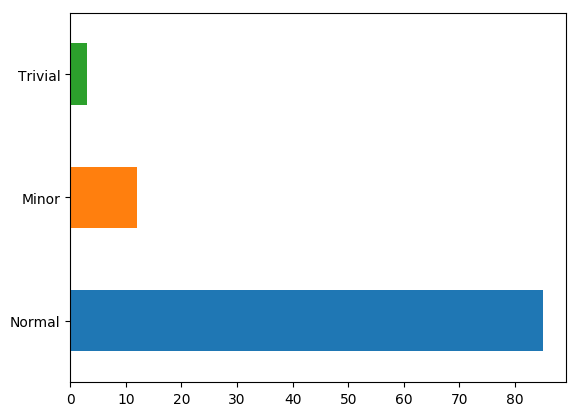

In [43]:
# Small tickets by severity
csv_file.query('Points<"1"')['Severity'].value_counts().plot.barh()

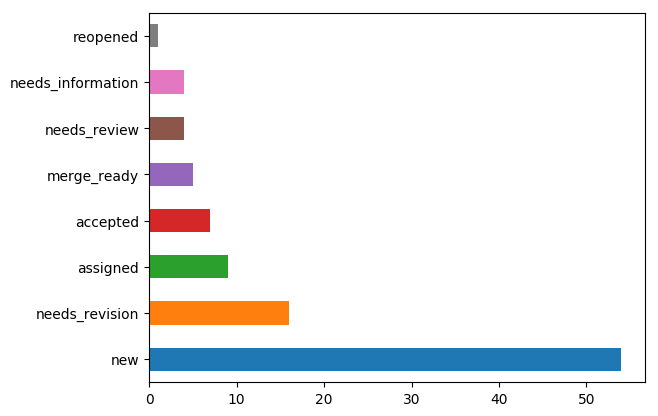

In [44]:
# Small tickets by status
csv_file.query('Points<"1"')['Status'].value_counts().plot.barh()

In [46]:
# small tickets with status assgined

csv_file.query('Points<"1"').query('Status=="assigned"')


,id,Summary,Status,Type,Owner,Priority,Milestone,Component,Version,Severity,Created,Modified,Parent ID,Points,Reviewer,Reporter,Keywords
1562,22717,Rename channelpadding.c's CHANNEL_IS_CLIENT to...,assigned,defect,mikeperry,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.3.1.1-alpha,Normal,24 jun. 2017 01:49:26,25 mar. 2018 02:35:36,#24905,0.1,NaN,teor,"technical-debt, disaster-waiting-to-happen, 03..."
1599,22948,"Padding, Keepalive and Drop cells should have ...",assigned,defect,NaN,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,16 jul. 2017 07:01:11,21 nov. 2018 20:11:49,NaN,0.5,NaN,teor,"tor-spec, 034-triage-20180328, 034-removed-201..."
1723,24079,metrics-bot should listen for private messages,assigned,defect,metrics-team,Medium,NaN,Metrics/Bot,NaN,Normal,30 oct. 2017 15:26:53,13 feb. 2018 19:06:19,NaN,0.5,NaN,pastly,NaN
1738,24182,Pad INTRODUCE cells to hide the number of link...,assigned,defect,dgoulet,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,8 nov. 2017 13:34:50,9 abr. 2018 12:44:43,#23493,0.5,NaN,teor,"prop224, tor-hs, defence-in-depth, 034-triage-..."
2467,29437,test-stem times out intermittently,assigned,defect,NaN,Medium,Tor: 0.2.9.x-final,Core Tor/Stem,Tor: 0.2.4.8-alpha,Normal,8 feb. 2019 16:41:49,29 may. 2019 03:11:44,NaN,0.2,NaN,rl1987,tor-ci-fail-sometimes
2545,29826,Rename router_status_t to avoid confusion with...,assigned,defect,neel,Medium,Tor: unspecified,Core Tor/Tor,NaN,Normal,19 mar. 2019 22:55:45,1 abr. 2019 01:29:35,NaN,0.2,NaN,teor,"technical-debt, fast-fix, easy, intro"
2548,29831,"Backport ""enable expensive hardening message i...",assigned,defect,teor,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.2.9.1-alpha,Normal,20 mar. 2019 09:06:49,20 mar. 2019 10:05:47,#29528,0.05,NaN,teor,"tor-ci, tor-test, 041-proposed, fast-fix"
2549,29832,Use the correct library names when UBSan isn't...,assigned,defect,teor,Medium,Tor: unspecified,Core Tor/Tor,Tor: 0.2.9.1-alpha,Normal,20 mar. 2019 09:33:52,20 mar. 2019 10:06:07,#29528,0.05,NaN,teor,"tor-ci, tor-test, 041-proposed, fast-fix"
2837,15054,Complete implementation of prop220 (ed25519 id...,assigned,defect,nickm,Low,Tor: unspecified,Core Tor/Tor,Tor: 0.2.7,Normal,27 feb. 2015 14:56:28,6 sep. 2017 13:48:04,NaN,(parent),NaN,nickm,"tor-crypto-identity, tor-ed25519-proto"


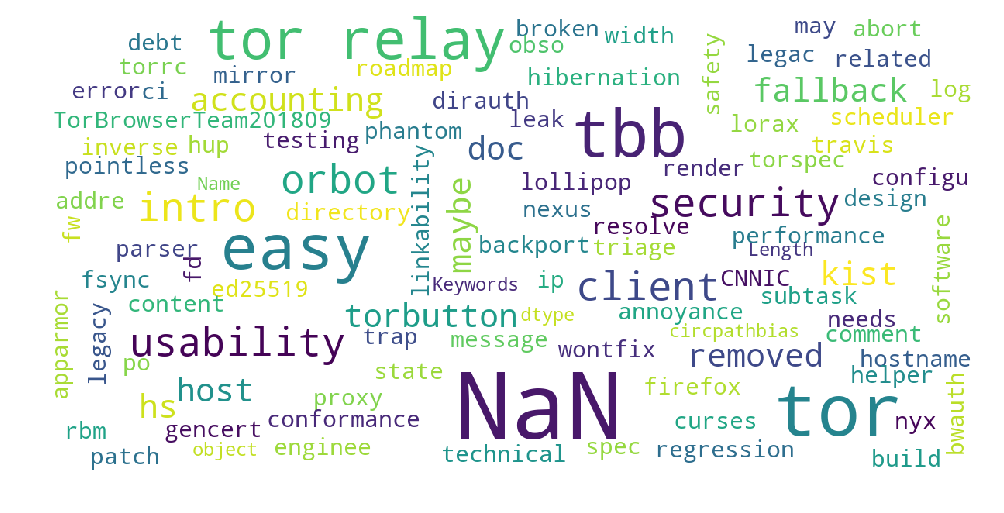

In [55]:
# A cloud for the keywords

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(csv_file['Keywords'])